# DSA Practice Programming Lab
The goal of this lab is to review the concepts seen in class so far, and to use some of the tools not already implemented for homework. This will be a good starting point to prepare for the midterm exam so make notes of any questions/areas that you find more difficult. 

The first few questions were taken from Cracking the Coding Interview, 6th edition. 

In [1]:
import pytest

## Question 1: 
Given a short string $s1$ and a long string $s2$, write a function that counts how many permutations of $s1$ are found in $s2$. Also, give the runtime analysis (should be O($n1*n2$) where $n1$ is the length of $s1$ and $n2$ is the length of $s2$). This is roughly linear in $n2$ if $n1$ is small. 

Example: Your function should return three permutations for $s1$ = 'ab', $s2$ = 'baba' (starting at indices 0, 1, 2) and one permutation for $s1$ = 'cake' and $s2$ = 'cacke' (starting at index 1).

In [2]:
def create_dict(s):
    """
    Helper function to create a dictionary from a string
    O(n)
    """
    s_dict = {}
    for i in range(len(s)):
        if s[i] in s_dict:
            s_dict[s[i]] +=1
        else:
            s_dict[s[i]] = 1
    return s_dict


def permutation(s1, s2):
    """
    Returns number of permutations of s1 in s2
    O(n^2) 
    """
    if s1 == "":
        return 0
    s1_dict = create_dict(s1) # O(len(s1))
    n = 0
    for i in range(len(s2)-len(s1)+1): # go through all substrings of s2 with len(s1), O(len(s2-ish))
        s = s2[i: i+len(s1)] # create substring of length len(s1) within s2
        sub_dict = create_dict(s) # O(len(s1))
        if sub_dict == s1_dict:
            n +=1
    return n


""" Test Function """
def test_function_1():
    assert permutation("ab", "baba") == 3, "Test one failed"
    assert permutation("", "") == 0, "Test two failed"
    assert permutation("fish", "babyshark") == 0, "Test three failed"
    assert permutation("cake", "cacke") == 1, "Test four failed"


test_function_1()


## Question 2: 
 Given two strings, write a function to check if they are one edit (or zero edits) away. For the purposes of this question, a single edit refers to either inserting a character, deleting a character, or replacing a character.

Example: Your function should return True for "lake" and "bake" (one edit) but False for "lake" and "ace" (two edits).

In [4]:
def check_edits(s1, s2):

    mid1 = len(s1)//2
    mid2 = len(s2)//2
    left1 = s1[0:mid1]
    left2 = s2[0:mid2]
    right1 = s1[mid1:]
    right2 =s2[mid2:]

    if (len(left1) == 1 and len(left2) == 1) and (len(right1) == 1 and len(right2) == 1):
        if left1 == left2:
            if right1 != right2:
                return True
        if right1 == right2:
            if left1 != left2:
                return True
        if left1 != left2 and right1 != right2:
            return False
        else:
            return False
    else:
        if left1 == left2 and right1 == right2:
            return False
        if left1 == left2:
            if right1 != right2:
                if len(right1) == 2 and len(right2) == 1:
                    if right2 in right1:
                        return True
                    else:
                        return False
                elif len(right2) == 2 and len(right1) == 1:
                    print(right1, right2)
                    if right1 in right2:
                        return True
                    else:
                        return False 
                s1 =  s1[mid1:]
                s2 = s2[mid2:]
                return check_edits(s1, s2)
        elif right1 == right2:
            if left1 != left2:
                if len(left1) == 2 and len(left2) == 1:
                    if left2 in left1:
                        return True
                    else:
                        return False
                elif len(left2) == 2 and len(left1) == 1:
                    if left1 in left2:
                        return True
                    else:
                        return False
                s1 = s1[0:mid1]
                s2 = s2[0:mid2]
                return check_edits(s1, s2)
        else:
            return False

""" Test Function """
def test_function_2():
    assert check_edits("lake", "bake") == True, "Test one failed"
    assert check_edits("lake", "ace") == False, "Test two failed"
    assert check_edits("aminal", "aimnal") == False, "Test three failed"
    assert check_edits("lake", "lace") == True, "Test four failed"
    assert check_edits("lake", "main") == False, "Test five failed"

test_function_2()

## Question 3: 
Write a function that takes in two lists $l1$ and $l2$ and returns whether $l2$ is a rotation of $l1$ in $O(n1+n2)$ time, where $n1$ is the length of $l1$ and $n2$ is the length of $l2$. 

Example: Your function should return True for $11 = [h,e,l,l,o]$, $l2 = [e,l,l,o,h]$.

Update from email: You may remove the time requirement of O(n) but try to think of a solution that uses list concatenation. 

In [97]:
def list_rotation(l1, l2):
    cat = l1
    cat.extend(l1)
    str(cat)
    # try converting list to string (using join), then checking if cat contains l2

""" Test Function """
def test_function_3():
    assert list_rotation(['h','e','l','l','o'], ['e','l','l','o','h']) == True, "Test one failed"
    assert list_rotation(['h','e','l','l','o'], ['l','e','l','o','h']) == False, "Test two failed"
    assert list_rotation(['l','a','k','e'], ['l','a','e','k']) == False, "Test three failed"
    assert list_rotation([], []) == None, "Test four failed"
    assert list_rotation(['r'], ['r']) == True

test_function_3()

l1 = ['h', 'e', 'l', 'l', 'o']
l2 = ['e', 'l', 'l', 'o', 'h']
print(list_rotation(l1, l2))

AssertionError: Test one failed

## Question 4: 
Given a list $l$ that is a rotation of a sorted list, write a function that returns the index with the minimum element in O($log n$), where $n$ is the length of $l$.

Example: Your function should return 3 for $l = [4.5, 6, 8.2, 0, 1.3, 1.4]$.

In [75]:
def return_min(l):
    """ 
    """
    # deal with some edge cases
    if len(l) == 0:
        return None
    elif len(l) == 1:
        return 0
    elif len(l) == 2:
        if l[0] < l[1]:
            return 0
        else:
            return 1
    last = l[len(l)-1] # keep track of last so you know if you have overshot
    if last < l[len(l)-2]: # checks if last element is min
        return len(l)-1
    curr = len(l)//2
    n = 0
    while l[curr] > l[curr+1] or l[curr] > l[curr-1]: 
        n +=1
        if l[curr] > last:
            curr = (curr+(len(l)-1))//2
        elif l[curr] < l[len(l)-1]:
            curr = (0+curr)//2
    print("Len(list):", len(l), " N: ", n)
    return curr

""" Test Function """
def test_function_4():
    assert return_min([4.5,6,8.2,0,1.3,1.4]) == 3, "Test one failed"
    assert return_min([1, 2, 3, 4, 5, 6]) == 0, "Test two failed"
    assert return_min([6, 1, 2, 3, 4, 5]) == 1, "Test three failed"
    assert return_min([21388]) == 0, "Test four failed"
    assert return_min([]) == None, "Test five failed"
    assert return_min([2, 1]) == 1, "Test six failed"
    assert return_min([2, 3, 1]) == 2, "Test seven failed"
    assert return_min([2, 3, 4, 1]) == 3, "Test eight failed"
    

test_function_4()

# if two mins are same, what should we do?
# should we assume lists are sorted, or do error checking?
print(return_min([4.5,6,8.2,0,1.3,1.4]))
print(return_min([1, 2, 3, 4, 5, 6, 0]))
print(return_min([1, 2, 3])) #keeps repeating if last item is min
# print(return_min([1, 2, 3, 4, 5, 6, 0]))

Len(list): 6  N:  0
Len(list): 6  N:  2
Len(list): 6  N:  1
Len(list): 6  N:  0
3
6
Len(list): 3  N:  1
0


## Question 5: 
Implement Merge Sort using the doubly linked list class you implemented for homework 2. Your algorithm should not have to copy any nodes when recursing (but may have to update O(1) pointer values). 

In [40]:
"""
Implementation of Doubly Linked List
"""
class Node:
    """
    defines one node of the linked list
    """
    def __init__(self, val):
        """
        val: value of node
        next: pointer to next node of linked list
        """
        self.val = val
        self.prev = None
        self.next = None
    def print_list(self):
        print(self.val, end=", ")
        if self.next != None:
            self.next.print_list()
        else:
            print("\n")

class DLL:
    """
    doubly linked list
    """
    def __init__(self):
        """
        head: first node in linked list
        tail: last node in linked list
        length: integer value of number of nodes in the list
        """
        self.head = None
        self.tail = None
        self.length = 0
    def length(self):
        """ returns length of linked list """
        return self.length
    def push(self, new):
        """ add a new node to the front of the list
        """
        if self.length == 0:
            self.head = new
            self.tail = new
        else:
            if self.length == 1:
                self.tail.prev = new
            new.next = self.head
            self.head.prev = new
            self.head = new
        self.length += 1 # keep track of list length
    def index(self, i):
        """
        returns a node at a given index in a list
        i is given index
        """
        curr = self.head
        for j in range (i):
            if curr == None:
                return None
            curr = curr.next
        return curr
    def insert(self, new, i):
        """  insert a new node after a given node
        """
        before = self.index(i)
        after = before.next
        new.prev = before
        if before.next is None:
            self.tail = new
        else:
            new.next = after
            before.next = new
            after.prev = new
        self.length += 1 # keep track of list length

    


In [52]:
# def merge(left, left_tail, right, right_head):
#     left.next = right_head
#     right.prev = left_tail

def merge(left, right):
    """ 
    takes in left and right nodes
    returns a node

    base cases: if right is empty return left, if left is empty return right
    figure out which of the two nodes passed in is smaller
    call merge on smaller.next, bigger
    """
    # if left node is none, return right
    if left == None:
        print("Left is none, so right is returned:", right.val)
        return right
    # if right node is none, return left
    if right == None:
        print("Right is none, so left is returned:", left.val)
        return left
    
    if left.val < right.val:
        left.next = merge(left.next, right)
        left.next.prev = left
        left.prev = None
        return left
    else:
        right.next = merge(left, right.next)
        right.next.prev = right
        right.prev = None
        return right

        
def merge_sort(head):
    """
    takes in a node (head)
    
    base case (return node if node.next is none)
    split into two
    recurse on two heads of smaller lists
    """
    # Base case: A list of zero or one elements is sorted, by definition.
    if head.next == None: # maybe check if head == None too?
        return head
    
    # Recursive case: 
    
    # split into two
    fast = head
    slow = head 
    while(fast.next and fast.next.next): 
        fast = fast.next.next 
        slow = slow.next
    second = slow.next
    slow.next = None
    head.print_list()
    second.print_list()
    
    # Recur for left and right halves  
    head = merge_sort(head)
    second = merge_sort(second)


    print("merge (", head.val,",", second.val, ")")
    return merge(head, second)


l = DLL()
l.push(Node(4))
l.push(Node(1))
l.push(Node(9))
l.push(Node(5))
l.push(Node(16))
l.push(Node(1))
l.head.print_list()
merge_sort(l.head).print_list()

1, 16, 5, 9, 1, 4, 

1, 16, 5, 

9, 1, 4, 

1, 16, 

5, 

1, 

16, 

merge ( 1 , 16 )
Left is none, so right is returned: 16
merge ( 1 , 5 )
Right is none, so left is returned: 16
9, 1, 

4, 

9, 

1, 

merge ( 9 , 1 )
Right is none, so left is returned: 9
merge ( 1 , 4 )
Right is none, so left is returned: 9
merge ( 1 , 1 )
Right is none, so left is returned: 16
1, 1, 4, 5, 9, 16, 



# Challenges 
Pick at least one of the following challenges. I recommend the first one if you'd like to practice divide-and-conquer algorithms.

## Challenge 1 - Skyline Problem
Given a list of buildings including their positions and heights, find the skyline visible using a divide-and-conquer approach. See image below for a skyline example. First, you should think about how you will represent a building and how you will represent the outputted skyline. You may assume all buildings are rectangular (what a boring city). 

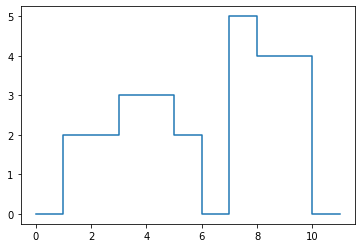

In [4]:
import matplotlib.pyplot as plt
plt.step([i for i in range(12)], [0,0,2,2,3,3,2,0,5,4,4,0])

In [ ]:
# list of tuples of (start, end, height)
buildings = [(1, 6, 2), (3, 5, 3), (7, 10, 4), (7, 8, 5)]
# merge sort

## Challenge 2 - Minesweeper
Design an object class to represent the game of minesweeper. Think about how the way you represent the game will impact the runtime of updating the grid. You may also want to allow the user to start a game with different difficulty levels. 

If you want to add some funk, think about how you can change the structure or elements of the game (maybe the landscape isn't a grid? are there fun surprises to uncover?)